# Atividade 1 - **Regressão Linear**

Discente: **Igor Lima Rocha**

Docente: **Jacqueline Midlej**

Disciplina: **Aquisição de Conhecimento**

Semestre: **2023.2**

## Introdução

Antes de começar o desenvolvimento das atividades, é necessário importar todas as bibliotecas que vão ser utilizadas no decorrer do código

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                               # Gráficos
import matplotlib.pyplot as plt                     # Gráficos

from sklearn.linear_model import LinearRegression   # Utilizado apenas para facilitar o problema 2

Além também de garantir que os arquivos dos dados estão no notebook, e são chamados abaixo

In [ ]:
houses = pd.read_csv('houses.csv')
beer_contest = pd.read_csv('beer_contest.csv', sep=';')

## Problema 1

> Preço de casas

Começamos verificando se o DF das casas está importado e é mostrado aqui no código


In [ ]:
# Mostrando as top 10 linhas
houses.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


- **Passo 1:**

Utilizei um método do próprio `pandas` para verificar a variável com melhor correlação.

In [ ]:
# Calcular as correlações entre as colunas e "SalePrice"
correlations = houses.corr(numeric_only = True)["SalePrice"]

# Encontrar a feature com a maior correlação (ignorando "SalePrice" e valores nulos)
max_corr_feature = correlations.drop("SalePrice").idxmax()
max_corr_value = correlations.drop("SalePrice").max()

print(f"A feature com maior correlação é {max_corr_feature}, com correlação de {max_corr_value}")

A feature com maior correlação é OverallQual, com correlação de 0.7909816005838053


Com isso conseguimos a feature `OverallQual` que possui uma correlação de `0.79`
Assim podemos plotar o gráfico

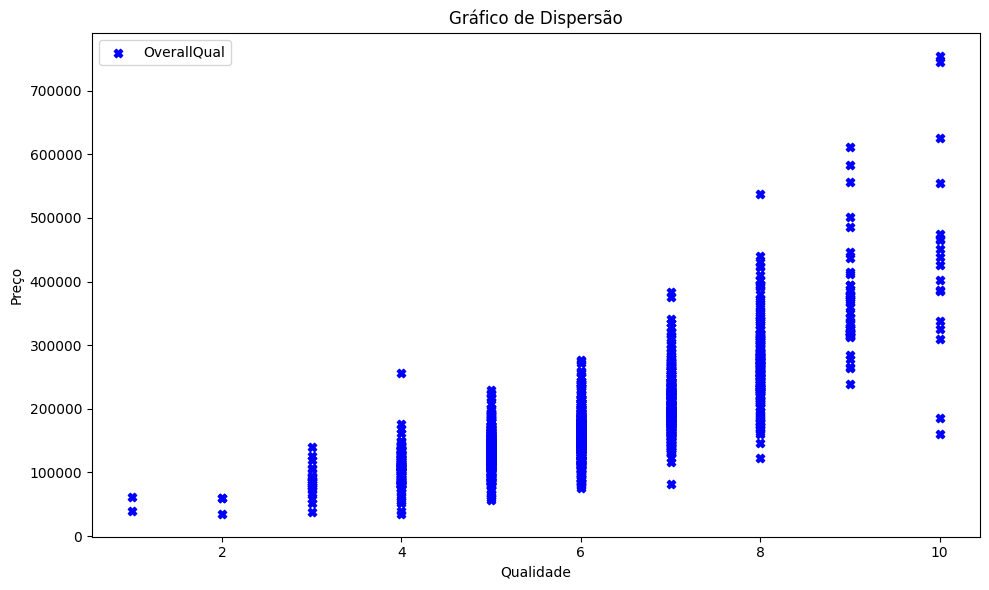

In [ ]:
# Definindo as variaveis para os gráficos futuros
X = houses[[max_corr_feature]]
y = houses['SalePrice']

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', marker='X', label='OverallQual')
plt.xlabel('Qualidade')
plt.ylabel('Preço')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

- **Passo 2:**

Agora vamos implementar o calculo da função de custo.

In [ ]:
def cost_function(data, theta_0_, theta_1_):
  m = len(data)
  sum = 0

  for i in range(m):
    y_ = data.iloc[i]["SalePrice"]
    x = data.iloc[i][max_corr_feature]
    h_x = theta_0_ + theta_1_ * x
    sum += (h_x - y_) ** 2

  cost = sum / (2 * m)
  return cost

def cost_function_derivative(data, theta_0_, theta_1_, feature = None):
  m = len(data)
  sum = 0

  for i in range(m):
    y_ = data.iloc[i]["SalePrice"]
    x = data.iloc[i][max_corr_feature]
    h_x = theta_0_ + theta_1_ * x
    if(feature):
      sum += (h_x - y_) * data.iloc[i][feature]
    else:
      sum += (h_x - y_)

  cost = sum / m
  return cost

- **Passo 3:**

Agora sim podemos seguir para a função do gradiente descendente.

In [ ]:
def gradient_descent(learning_rate, max_iterations, convergence_tol):
  print(f"Calculando descendente com learning rate de {learning_rate}")
  theta_0_ = 0
  theta_1_ = 0

  prev_cost = float('inf')

  iterations = 0
  cost_history = []  # Lista para armazenar o custo em cada iteração


  for i in range(max_iterations):
    cost = cost_function(houses, theta_0_, theta_1_)
    cost_history.append(cost)  # Armazena o custo atual na lista

    if(abs(cost - prev_cost) <= convergence_tol):
      print("Convergiu")
      break

    next_theta_0 = theta_0_ - learning_rate * cost_function_derivative(houses, theta_0_, theta_1_)
    next_theta_1 = theta_1_ - learning_rate * cost_function_derivative(houses, theta_0_, theta_1_, max_corr_feature)

    theta_0_ = next_theta_0
    theta_1_ = next_theta_1

    prev_cost = cost
    iterations += 1

  if(iterations >= max_iterations):
    print("Não convergiu")

  print(f"Melhor theta_0: {theta_0_}")
  print(f"Melhor theta_1: {theta_1_}")

  return theta_0_, theta_1_, cost_history

In [ ]:
# Usando a função
gradient1 = gradient_descent(0.01, 100, 1)

Calculando descendente com learning rate de 0.01
Não convergiu
Melhor theta_0: -63.20813957048233
Melhor theta_1: 30424.89639938601


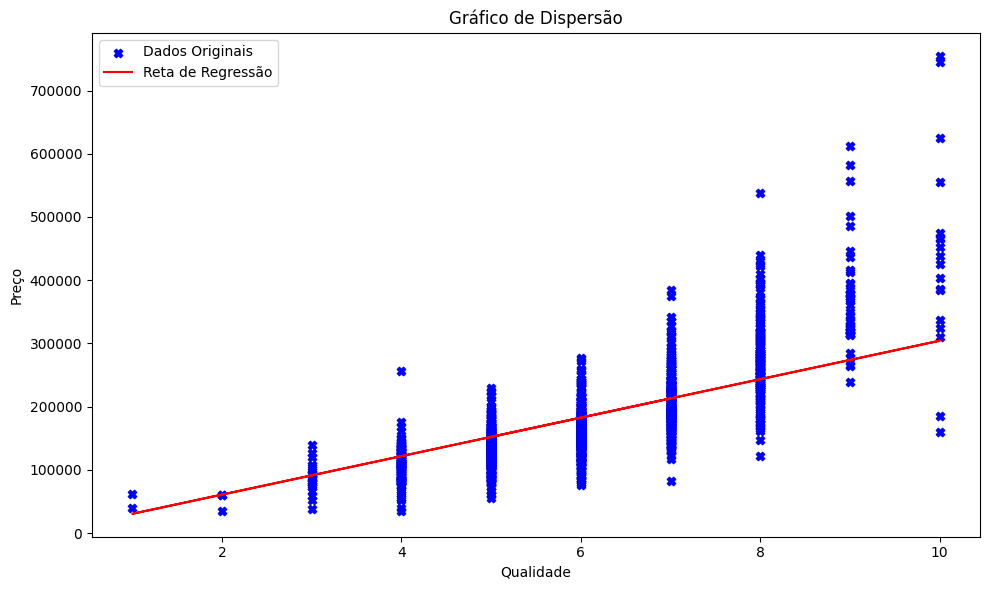

In [ ]:
y_pred = gradient1[0] + gradient1[1] * X


# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', marker='X', label='Dados Originais')
plt.plot(X, y_pred, color='red', label='Reta de Regressão')
plt.xlabel('Qualidade')
plt.ylabel('Preço')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

- **Passo 5:**

Testando para learning rates diferentes

In [ ]:
# Vou reutilizar a variável gradient1, que já foi calculado, com learning rate de 0.01
gradient2 = gradient_descent(0.05, 100, 1)

gradient3 = gradient_descent(0.00001, 100, 1)

Calculando descendente com learning rate de 0.05
Não convergiu
Melhor theta_0: -23209.622210061065
Melhor theta_1: -8098.873820008725
Calculando descendente com learning rate de 1e-05
Não convergiu
Melhor theta_0: 177.285556706517
Melhor theta_1: 1167.05344467519


Com os valores dos gradientes calculados, posso plotar o gráfico de dispersão comparando essas retas

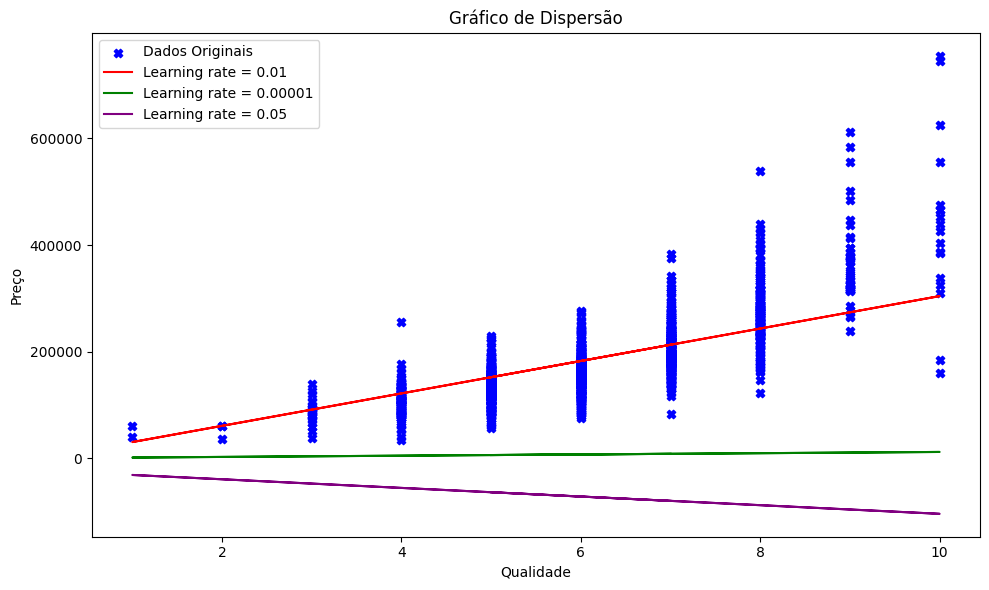

In [ ]:
# Pegando as retas
y_pred1 = gradient1[0] + gradient1[1] * X
y_pred2 = gradient2[0] + gradient2[1] * X
y_pred3 = gradient3[0] + gradient3[1] * X


# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', marker='X', label='Dados Originais')
plt.plot(X, y_pred1, color='red', label='Learning rate = 0.01')
plt.plot(X, y_pred3, color='green', label='Learning rate = 0.00001')
plt.plot(X, y_pred2, color='purple', label='Learning rate = 0.05')
plt.xlabel('Qualidade')
plt.ylabel('Preço')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Além também do gráfico de comparação do custo/iteração

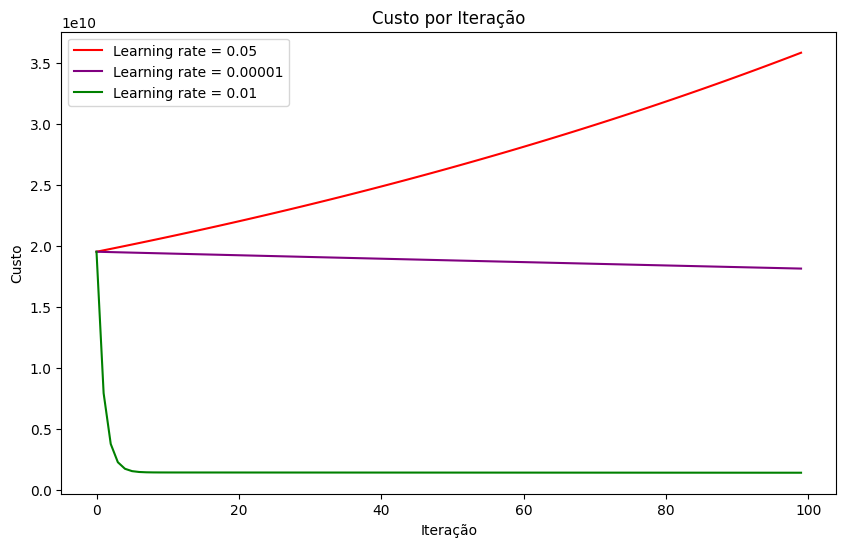

In [ ]:
# Plotando o gráfico de custo por iteração
plt.figure(figsize=(10, 6))
plt.plot(range(len(gradient2[2])), gradient2[2], color='red', label='Learning rate = 0.05')
plt.plot(range(len(gradient3[2])), gradient3[2], color='purple', label='Learning rate = 0.00001')
plt.plot(range(len(gradient1[2])), gradient1[2], color='green', label='Learning rate = 0.01')
plt.xlabel('Iteração')
plt.ylabel('Custo')
plt.title('Custo por Iteração')
plt.legend()
plt.show()



---



## Problema 2

> Competição de cervejas

Começamos verificando se o DF das competições está importado e é mostrado aqui no código

In [ ]:
# Mostrando as top 10 linhas
beer_contest.head(10)

,year,score
0,1,1
1,1,11
2,1,11
3,1,12
4,2,13
5,2,14
6,2,14
7,2,15
8,3,18
9,3,2


- **Tarefa 1:**

Para facilitar, vou fazer uso da função `LinearRegression` da biblioteca SKLearn, para calcular o gradiente descendente do gráfico.

In [ ]:
# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando os dados de entrada
X = beer_contest[['year']]
y = beer_contest['score']
model.fit(X, y)


# Calcular os valores preditos usando o modelo
predicted_scores = model.predict(X)

A partir do momento que temos o gradiente descendente, podemos plotar no gráfico de dispersão.

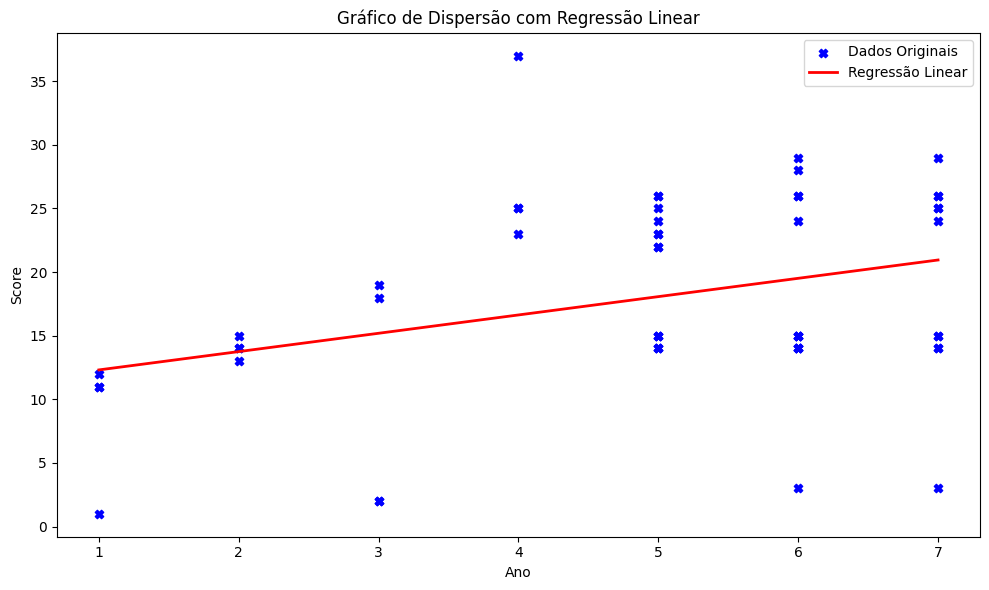

In [ ]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', marker='X', label='Dados Originais')
plt.plot(X, predicted_scores, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Ano')
plt.ylabel('Score')
plt.title('Gráfico de Dispersão com Regressão Linear')
plt.xticks(X['year'].unique())
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Podemos ver os coeficientes da reta, ainda fazendo uso da biblioteca SKLearn

In [ ]:
# Obter os coeficientes
theta_0 = model.intercept_
theta_1 = model.coef_[0]

print("Valor de theta_0:", theta_0)
print("Valor de theta_1:", theta_1)

Valor de theta_0: 10.86965418457131
Valor de theta_1: 1.439738080622059


- **Tarefa 2:**

a) Podemos mostrar a quantidade de empresa por ano da seguinte forma:

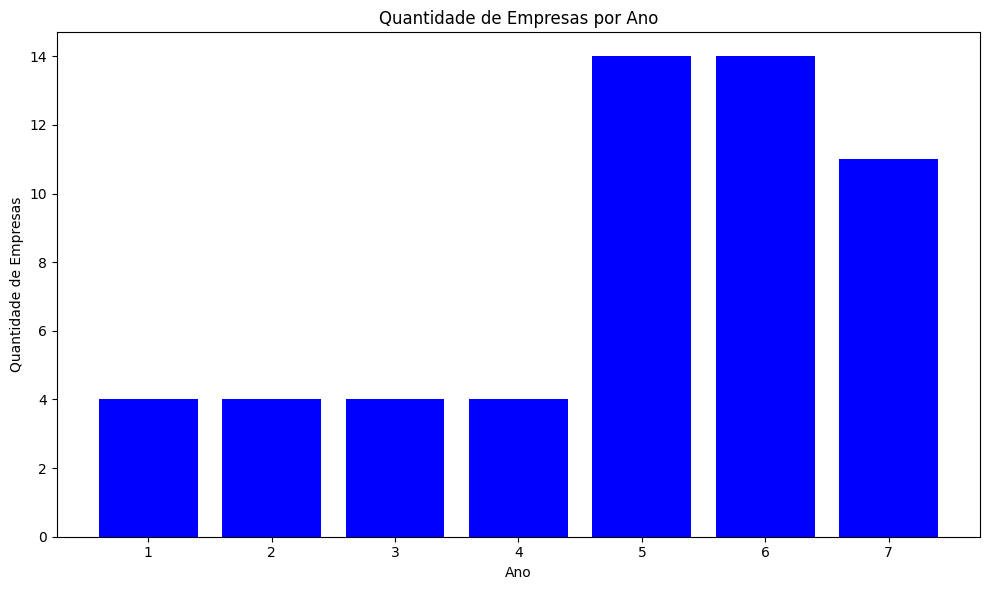

In [ ]:
# Contar a quantidade de empresas por ano
count_by_year = beer_contest['year'].value_counts().reset_index()
count_by_year.columns = ['year', 'quantidade_empresas']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(count_by_year['year'], count_by_year['quantidade_empresas'], color='blue')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Empresas')
plt.title('Quantidade de Empresas por Ano')
plt.xticks(count_by_year['year'])
plt.tight_layout()

# Mostrar o gráfico
plt.show()

b) Calculando a média por ano, temos que agrupar o data set por ano e calcular a média, e treinar novamente o modelo de regressão

In [ ]:
# Calcular a média dos scores por ano
mean_scores_by_year = beer_contest.groupby('year')['score'].mean().reset_index()

# Criar o modelo de regressão linear
model_mean = LinearRegression()

# Treinar o _meano usando os dados de entrada
X_mean = mean_scores_by_year[['year']]
y_mean = mean_scores_by_year['score']
model_mean.fit(X_mean, y_mean)

# Calcular os valores preditos usando o modelo
predicted_scores_mean = model_mean.predict(X_mean)

Agora sim podemos ver no gráfico esse novo modelo e seu data set

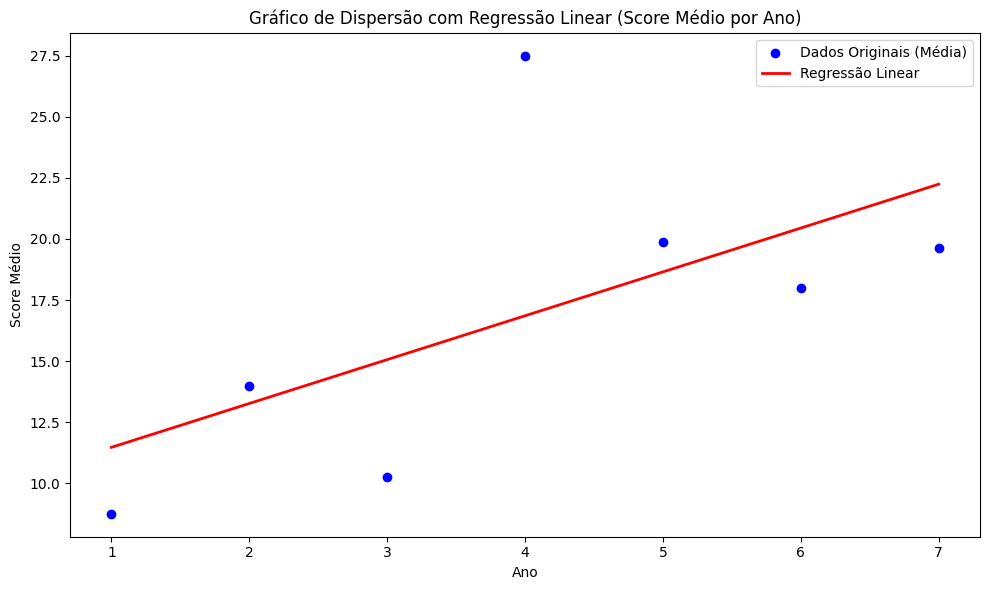

In [ ]:
# Criar o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_mean, y_mean, color='blue', marker='o', label='Dados Originais (Média)')
plt.plot(X_mean, predicted_scores_mean, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Ano')
plt.ylabel('Score Médio')
plt.title('Gráfico de Dispersão com Regressão Linear (Score Médio por Ano)')
plt.xticks(X_mean['year'])
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Agora podemos ver o coeficiente

In [ ]:
# Obter os coeficientes
theta_0_mean = model_mean.intercept_
theta_1_mean = model_mean.coef_[0]

print("Valor de theta_0:", theta_0_mean)
print("Valor de theta_1:", theta_1_mean)

Valor de theta_0: 9.67532467532468
Valor de theta_1: 1.7952226345083484


c) Agora podemos comparar no gráfico a diferença das regressões e dos dados

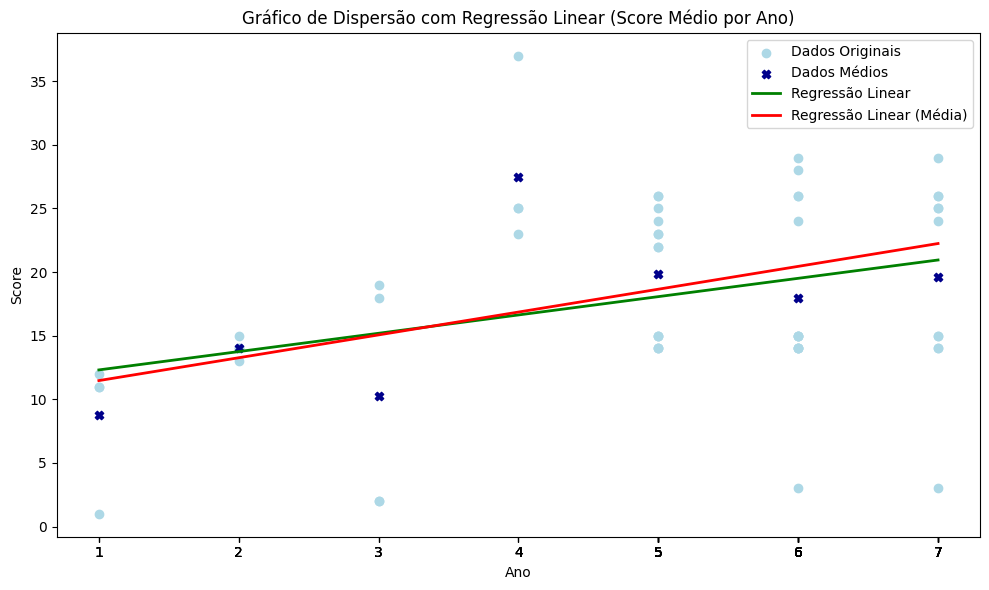

In [ ]:
# Criar o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='lightblue', marker='o', label='Dados Originais')
plt.scatter(X_mean, y_mean, color='darkblue', marker='X', label='Dados Médios')
plt.plot(X, predicted_scores, color='green', linewidth=2, label='Regressão Linear')
plt.plot(X_mean, predicted_scores_mean, color='red', linewidth=2, label='Regressão Linear (Média)')
plt.xlabel('Ano')
plt.ylabel('Score')
plt.title('Gráfico de Dispersão com Regressão Linear (Score Médio por Ano)')
plt.xticks(X['year'])
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [ ]:
print("Valor de theta_0:", theta_0)
print("Valor de theta_0_mean:", theta_0_mean)
print("------")
print("Valor de theta_1:", theta_1)
print("Valor de theta_1_mean:", theta_1_mean)

Valor de theta_0: 10.86965418457131
Valor de theta_0_mean: 9.67532467532468
------
Valor de theta_1: 1.439738080622059
Valor de theta_1_mean: 1.7952226345083484


A diferença nas linhas acontece porque os pontos individuais podem "puxar" a linha de regressão de maneiras diferentes. Quando você usa todos os pontos originais, a linha pode ser mais sensível a pontos que estão mais longe dos outros. Já quando você usa as médias por ano, os pontos individuais não têm tanto poder de "puxar" a linha, então ela pode ficar diferente.